<a href="https://colab.research.google.com/github/sid1336/Computational-Physics-Projects/blob/main/Multivariate%20distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

utkarsh sachdeva


# <center><font color=#46769B>Multivariate Distributions</font></center>

## <font color=#46769B>Introduction:</font>

This File continues the discussion of fiting rotation curve data from astronomical observations of dwarf galaxies to determine their dark matter mass content. Here we introduce two new techniques which can improve your Monte Carlo sampling analysis:

- Redefining sampling variables

- Sampling from multivariate proposal distributions to account for correlation in the variables

Our goals for this notebook are:
- Gain more experience with data fitting and importance sampling


## <center><font color=#46769B>Problem 1: Dark matter in dwarf galaxies</font></center>

### <font color=#46769B>Introduction</font>

In this problem, we will consider astrophysical data obtained by radio-wave observations of *another* nearby dwarf galaxy, IC2574, by [The HI Near Galaxy Survey (THINGS)](https://www2.mpia-hd.mpg.de/THINGS/Overview.html). Here is a picture of the galaxy IC2574, also known as Coddington's Nebula:
<div>
<img src="https://github.com/PHYS-2030-Computational-Methods/Lecture-notes/raw/main/figures/IC2574.jpg" width="300">
    <center><i>Figure credit: Stephen Leshin</i></center>
</div>

The *luminous* matter (stuff made from atoms) makes up around $4 \times 10^9 \; M_\odot$ of stars and gas. By fitting the rotation curve data, we will show that the *total* matter has a larger mass $M_{\rm tot}$. Therefore, the galaxy is mostly made up of dark matter, which cannot be seen directly but is inferred through its gravitational pull.

Much of the tasks here will be similar to Exercise 5. We will use the same model for circular velocity

$$v(r,M_{\rm tot},R_s) = \sqrt{ \frac{G M_{\rm tot} r^2}{(r + R_s)^3 } } \, . \qquad (1)$$

where $M_{\rm tot},R_s$ are the two unknown parameters that we will fit by Monte Carlo sampling.

Here, however, we will introduce a new and useful trick: *redefine your variables before you sample*. This solves a few issues you encountered in Exercise 5.

Before we discuss this, let's first load and plot the data for IC2574.

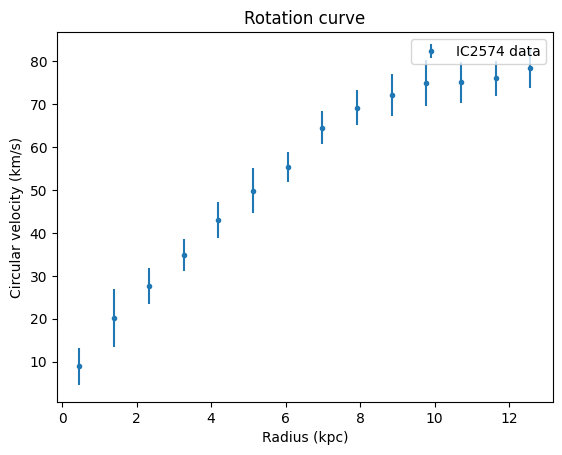

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Newton's constant
G = 4.3e-6

# Data

# radius (kpc)
radius = np.array([ 0.465421,  1.39626 ,  2.3271  ,  3.25794 ,  4.18879 ,  5.11963 ,
                    6.05047 ,  6.98131 ,  7.91215 ,  8.84299 ,  9.77383 , 10.7047  ,
                   11.6355  , 12.5664  ])

# mean circular velocity v (km/s)
mu = np.array([ 8.87, 20.15, 27.63, 34.81, 42.97, 49.89, 55.38, 64.56, 69.26,
               72.2 , 75.03, 75.13, 76.04, 78.38])

# error for circular velocity v (km/s)
sigma = np.array([4.32, 6.81, 4.28, 3.79, 4.24, 5.15, 3.54, 3.81, 4.  , 4.84, 5.3 ,
                  4.79, 4.04, 4.55])

plt.errorbar(radius,mu,yerr=sigma,fmt='.',label='IC2574 data')
plt.xlabel('Radius (kpc)')
plt.ylabel('Circular velocity (km/s)')
plt.title('Rotation curve')

plt.legend()
plt.show()

### <font color=#46769B>Trick: Redefine your variables</font>

We encountered a few issues in Exercise 5:

- One issue was that $M_{\rm tot}$ was many orders of magnitude larger than $R_s$. This made it a little tricky to tune your proposal distribution. It is easier if all your samples are $\mathcal{O}(1)$ numbers.

- A second issue was that negative values of $M_{\rm tot}$ or $R_s$ could cause an error `invalid value encountered in sqrt`. You could fix this by imposing $P(M_{\rm tot},R_s) = 0$ if $M_{\rm tot} < 0$ or $R_s < 0$. But it is easier if your sampling can exclude these values *automatically*.

Let's now define a new set of variables $x,y$ as follows:

$$x = \log_{10}(R_s) \, , \quad y = \log_{10}(M_{\rm tot})$$

or equivalently

$$M_{\rm tot} = 10^y \, , \quad R_s = 10^x $$

The advantage here is that $x$ and $y$ will not be different by many, many orders of magnitude. Also, $M_{\rm tot}$ and $R_s$ will always be positive for *any* values of $x,y$ (even if they are negative).

In terms of $x,y$, our circular velocity model in Eq. (1) is now

$$v(r,x,y) = \sqrt{ \frac{G r^2 10^y}{(r + 10^x)^3 } } \, . \qquad (2)$$

The (unnormalized) target distribution is

$$P(x,y) = e^{-\tfrac{1}{2} \chi^2(x,y)} \, .$$

where

$$\chi^2(x,y) = \sum_{k=1}^n \frac{(v(r_k,x,y) - \mu_k)^2}{\sigma_k^2}$$

where the $\mu_k$ and $\sigma_k$ are the circular velocity central values `mu` and errors `sigma` corresponding to the data and the circular velocity is evaluated at the $r$-values of the data points (`radius`), given above.

### <font color=#46769B>Problem</font>

Here you will use importance sampling to fit the rotation curve data for IC2574. You will sample $x,y$ from a proposal distribution $Q(x,y)$ that is a product of univariate normal distributions, i.e.,

$$Q(x,y) = Q_x(x) Q_y(y)$$

where

$$Q_x(x) = \mathcal{N}(\mu_x,\sigma_x) \, , \quad Q_y(y) = \mathcal{N}(\mu_y,\sigma_y)$$

where you are free to choose the parameters $\mu_x, \sigma_x, \mu_y, \sigma_y$.

Similar to Exercise 5, perform the following tasks:

- Define the target distribution $P(x,y)$ (using a `def` statement).

- Define the proposal distribution $Q(x,y)$ (using a `def` statement).

- Generate $N = 10^6$ samples for $x, y$ from $Q$.

- Calculate the weights $w = P(x,y)/Q(x,y)$. Then normalize your weights since your target distribution was not normalized.

- Plot a weighted 2D histogram for $x$ on the $x$-axis and $y$ on the $y$ axis. Label your axes, and choose a suitable number of bins.

- Using your samples for $x,y$, obtain samples for $M_{\rm tot}$ and $R_s$. Plot a weighted 2D histogram for $R_s$ on the $x$-axis and $M_{\rm tot}$ on the $y$ axis. Label your axes, and choose a suitable number of bins.

- Determine the mean $\langle M_{\rm tot} \rangle$ and error on the mean $E_{M_{\rm tot}}$. Add a comment on how your value compares to the luminous mass of IC2574.

- Calculate (and print) the weighted covariance matrix $C$ for your samples for $x,y$, i.e.,

$$C = \left( \begin{array} \Delta x^2 & \Delta xy \\ \Delta xy & \Delta y^2 \end{array} \right)$$

- Calculate (and print) a vector (list or array) with your weighted means $(\langle x \rangle, \langle y \rangle)$.

You will probably need to revise your proposal distribution a few times (by changing $\mu_x$, $\sigma_x$, $\mu_y$, $\sigma_y$) until you get good results. You may try $\mu_x = 1$, $\sigma_x = 1$, $\mu_y = 11$, $\sigma_y = 1$ as a starting point. Also, it is helpful to choose a smaller number of samples $N$ while you are getting everything to work.

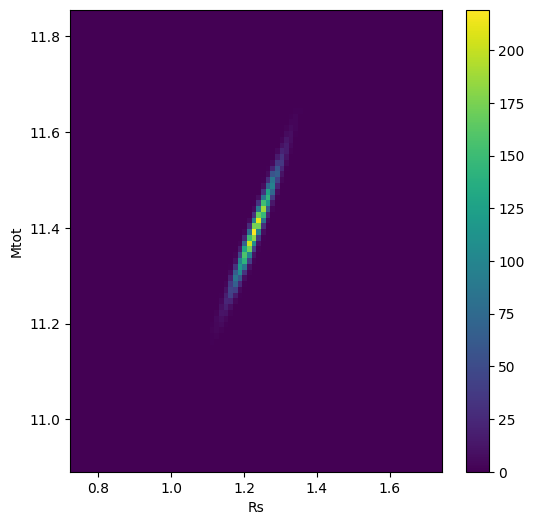

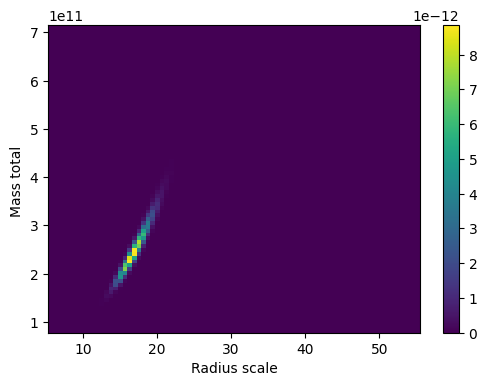

Mean and STD of Mtot is 257877253838.76456±60203898379.48513
The ratio between Mtot calculated and the luminous mass of IC2574 is 0.01551125560884468
Weighted Mean Vector: (1.2311124508237288, 11.397669256811861)
Weighted Covariance Matrix: [[0.00145287 0.00283325]
 [0.00283325 0.00582271]]


In [ ]:
N_samples = 10**6
mu_x_val = 1.25
sigma_x_val = 0.1
mu_y_val = 11.4
sigma_y_val = 0.1

def chi_sq(x, y):
    r = radius
    V = np.sqrt(G * r**2 * 10**y / (r + 10**x)**3)
    return np.sum((V - mu)**2 / sigma**2)

def P(x, y):
    if (x > 0) and (y > 0):
        return np.exp(-0.5 * chi_sq(x, y))
    else:
        return 0

def Qx():
    return np.random.normal(mu_x_val, sigma_x_val, N_samples)

def Qy():
    return np.random.normal(mu_y_val, sigma_y_val, N_samples)

x_samples, y_samples = Qx(), Qy()

P_vectorized = np.vectorize(P)
chi_sq_vectorized = np.vectorize(chi_sq)

weight = P_vectorized(x_samples, y_samples) / (Qy() * Qx())
w = weight / np.mean(weight)
Mtot_samples = 10**y_samples
Rs_samples = 10**x_samples

plt.figure(figsize=(6, 6))
plt.hist2d(x_samples, y_samples, density=True, weights=w, bins=[80, 80])
plt.xlabel('Rs')
plt.ylabel('Mtot')
plt.colorbar()
plt.show()

plt.figure(figsize=(6, 4))
plt.hist2d(Rs_samples, Mtot_samples, density=True, weights=w, bins=[80, 80])
plt.xlabel('Radius scale')
plt.ylabel('Mass total ')
plt.colorbar()
plt.show()

mean_Mtot = np.mean(Mtot_samples)
std_Mtot = np.std(Mtot_samples)
print(f'Mean and STD of Mtot is {mean_Mtot}±{std_Mtot}')
print(f'The ratio between Mtot calculated and the luminous mass of IC2574 is {(4*10**9)/mean_Mtot}')

def weighted_mean_vector(x, y, w):
    xm = np.sum(x * w) / np.sum(w)
    ym = np.sum(y * w) / np.sum(w)
    return xm, ym

def weighted_covariance(x, y, w):
    xm = np.sum(x * w) / np.sum(w)
    ym = np.sum(y * w) / np.sum(w)

    cov = np.sum(w * (x - xm) * (y - ym)) / np.sum(w)

    return np.array([[np.sum(w * (x - xm)**2) / np.sum(w), cov], [cov, np.sum(w * (y - ym)**2) / np.sum(w)]])

# Evaluate and print results
mean_vector_samples = weighted_mean_vector(x_samples, y_samples, w)
covariance_matrix_samples = weighted_covariance(x_samples, y_samples, w)

print(f'Weighted Mean Vector: {mean_vector_samples}')
print(f'Weighted Covariance Matrix: {covariance_matrix_samples}')


## <font color=#46769B>Problem 2: Sampling from multivariate distributions</font>

### <font color=#46769B>Introduction</font>

In Problem 1, we chose a multivariate proposal distribution $Q(x,y)$ that factorized as the product of two univariate distributions $Q_x(x) Q_y(y)$, each of which was sampled independently. That is, our sampling assumed that $x$ and $y$ were *uncorrelated*.

However, your 2D histogram from Problem 1 should show that $x$ and $y$ *are* indeed correlated, i.e., the preferred region lies along a diagonal line, and when you calculated the covariance matrix $C$, you found the off-diagonal element was not zero. This is due to the fact that $x$ and $y$ *are correlated in the target distribution*.

If quantities in the target distribution are correlated, it can improve your sampling to include a similar correlation in your proposal distribution. Here we will show how to accomplish this.

### <font color=#46769B>Problem</font>

Perform the following tasks:

- Define (using a `def` statement) a multivariate normal distribution $Q(x,y)$ that has a mean vector $\vec{\mu}$ and covariance matrix $C$. For $\vec{\mu}$ and $C$, define them to be the vector of means and covariance matrix $C$ you calculated in Problem 1.

- Generate $N=10^6$ samples for $x$ and $y$ from a multivariate normal distribution using `numpy.random.multivariate_normal(mu,C,num)` where `mu` is the two-component object $\vec{\mu}$ and `C` is the $2 \times 2$ covariance matrix $C$, and `num` is the number of samples $N$.

- Calculate the weights $w = P(x,y)/Q(x,y)$, where the target PDF $P$ is the same as in Problem 1. Normalize the weights.

- Plot a weighted 2D histogram for $x$ on the $x$-axis and $y$ on the $y$ axis. Label your axes, and choose a suitable number of bins.

- Using your samples for $x,y$, obtain samples for $M_{\rm tot}$ and $R_s$. Plot a weighted 2D histogram for $R_s$ on the $x$-axis and $M_{\rm tot}$ on the $y$ axis. Label your axes, and choose a suitable number of bins.

- Determine the mean $\langle M_{\rm tot} \rangle$ and error on the mean $E_{\rm M_{\rm tot}}$.

Finally, let's check which proposal distribution did a better job. You might notice that your histogram in Problem 1 looks a bit noisier than the one here in Problem 2. In Assignment 4, we argued you can evaluate `numpy.var(w*f(x))` to compare different proposal distributions in calculating some quantity $\langle f (x) \rangle$. Here, let's replace $f(x)$ with $M_{\rm tot} = 10^y$ to compare our proposal distributions in calculating $M_{\rm tot}$.

- Compute `numpy.var(w*10**y)` using your samples for $y$ and weights `w` from Problem 1 and also using the samples `y` and weights `w` found here in Problem 2. You should find a smaller value for the latter, which says that you have chosen a better proposal distribution here in Problem 2.

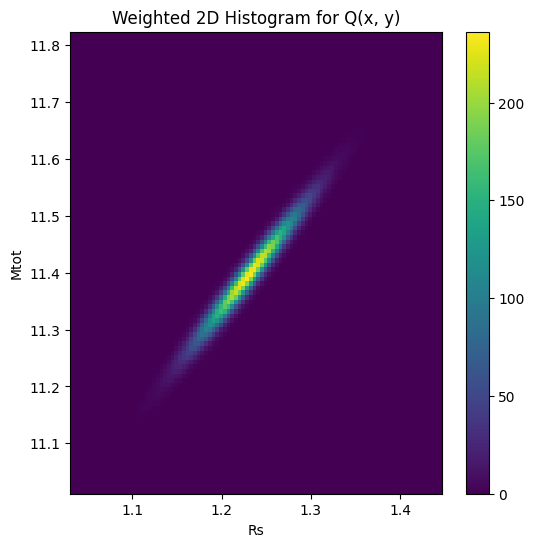

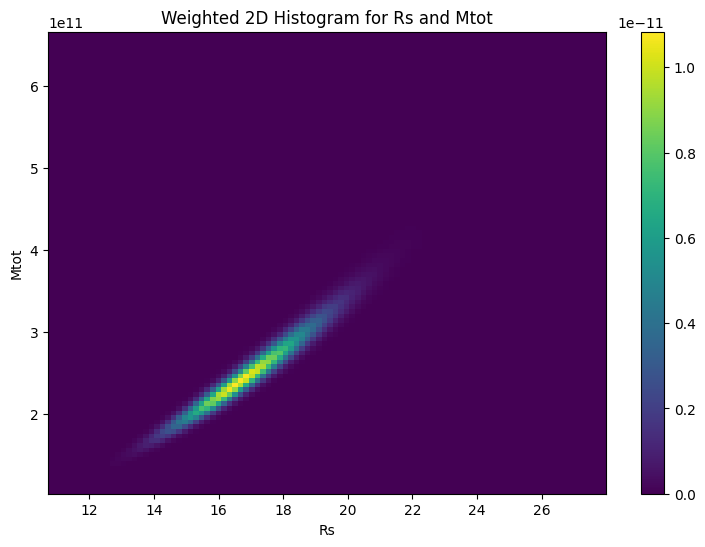

Variance from Problem 1: 3619123065.363817
Variance from Problem 2: 2028021232.89522
Mean and error on the mean of Mtot: 254021027947.15897 ± 45033556.74266935


In [ ]:
N_samples_Q = 10**6
mu_x_Q = 1.25
sigma_x_Q = 0.1
mu_y_Q = 11.4
sigma_y_Q = 0.1

def Q_distribution_samples(N):
    C_Q = covariance_matrix_samples
    mu_Q = mean_vector_samples
    samples_Q = np.random.multivariate_normal(mu_Q, C_Q, N)
    return samples_Q

weights_Q_samples = np.ones(N_samples_Q)

samples_Q_samples = Q_distribution_samples(N_samples_Q)
wQ_samples = weights_Q_samples / np.sum(weights_Q_samples)

plt.figure(figsize=(6, 6))
plt.hist2d(samples_Q_samples[:, 0], samples_Q_samples[:, 1], density=True, weights=wQ_samples, bins=[100, 100])
plt.xlabel('Rs')
plt.ylabel('Mtot')
plt.title('Weighted 2D Histogram for Q(x, y)')
plt.colorbar()
plt.show()

Mtot_samples_Q = 10**samples_Q_samples[:, 1]
Rs_samples_Q = 10**samples_Q_samples[:, 0]

plt.figure(figsize=(9, 6))
plt.hist2d(Rs_samples_Q, Mtot_samples_Q, density=True, weights=wQ_samples, bins=[100, 100])
plt.xlabel('Rs')
plt.ylabel('Mtot')
plt.title('Weighted 2D Histogram for Rs and Mtot')
plt.colorbar()
plt.show()

Mtot_mean_Q = np.mean(Mtot_samples_Q)
Mtot_std_Q = np.std(Mtot_samples_Q) / np.sqrt(N_samples_Q)
variance_1_Q = np.var(wQ_samples * 10**y_samples)
variance_2_Q = np.var(wQ_samples * 10**samples_Q_samples[:, 1])

print(f'Variance from Problem 1: {variance_1_Q}')
print(f'Variance from Problem 2: {variance_2_Q}')
print(f'Mean and error on the mean of Mtot: {Mtot_mean_Q} ± {Mtot_std_Q}')
